## **MileStone_1**

Debugging dataset: small enough to test code with; reasonable code should run in 2 minutes

Working dataset:  large enough to do the problem on (training should run no more than 40 minutes)

Convert these datasets to pandas

*   I suggest that you convert datetime to pandas timestamps (allows for time deltas and time manipulation)
*   Pickle (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_pickle.html)  the data.  That converts it to a binary file which can be loaded directly (must faster) into the correct datatypes




## **License**

This program is free software: you can redistribute it and/or modify it under the terms of the GNU Lesser General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License along with this program. If not, see <https://www.gnu.org/licenses/>.


## **Import Packages & Functions**

In [ ]:
import pandas
from sklearn.model_selection import train_test_split
def getfile(location_pair,**kwargs):
    (loc,gdrive)=location_pair
    loc = 'https://drive.google.com/uc?export=download&id='+gdrive.split('/')[-2]

    #Convert these datasets to pandas
    raw_dataset=pandas.read_csv(loc,**kwargs)
    #Convert datetime to pandas timestamps
    raw_dataset['DATE'] = pandas.to_datetime(raw_dataset['DATE'], format='%Y / %m')

    ## seperate the data by "year"
    split_date = '1992-01-01'
    debugging_dataset = raw_dataset[raw_dataset['DATE'] < split_date] #1990-1991 (2 years)
    debugging_dataset = debugging_dataset.sort_values(by='DATE', ascending=True)
    debugging_dataset = debugging_dataset.reset_index(drop=True) # reset the data index
    working_dataset = raw_dataset[raw_dataset['DATE'] >= split_date] #1992-2023 (~32 years)
    working_dataset = working_dataset.sort_values(by='DATE', ascending=True)
    working_dataset = working_dataset.reset_index(drop=True) # reset the data index

    return raw_dataset, debugging_dataset, working_dataset

# **Import the CSV files**
Load the New York population&weather dataset and tonnage dataset.

In [ ]:
fname_1=("NY_Population_Weather_Data.csv","https://drive.google.com/file/d/1DkB88nrVF2B60Rjxi_7fzRnD31-LUqXH/view?usp=sharing")
fname_2=("NY_Tonnage_Data_v2.csv","https://drive.google.com/file/d/1-57Sr-WC3g5MRxSXCun6HpD-SB1C-B6Q/view?usp=sharing")

raw_dataset_1, debugging_dataset_1, working_dataset_1=getfile(fname_1)
print("raw_dataset_1 dimension:", raw_dataset_1.shape)

raw_dataset_2, debugging_dataset_2, working_dataset_2=getfile(fname_2)
print("raw_dataset_2 dimension:", raw_dataset_2.shape)

raw_dataset_1 dimension: (2023, 11)
raw_dataset_2 dimension: (1983, 9)


### **Merge the debug_dataset:**
small enough to test code with; reasonable code should run in 2 minutes

In [ ]:
debugging_dataset = pandas.merge(debugging_dataset_1, debugging_dataset_2, on=["DATE", "BOROUGH"], how='right')

#Pickle the data
debugging_dataset.to_pickle('debugging_dataset.pkl')

debugging_dataset

,DATE,BOROUGH,POPULATION,POPULATION PERCENTAGE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,TSUN,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS
0,1990-01-01,Manhattan,1487536,20.31,NaN,135.8,45.0,5.20,8.64,1.75,9018.0,24.4,0.0,0.0,0.0,0.0,0.0,0.0
1,1990-01-01,Queens,1951598,26.65,NaN,135.8,45.0,5.20,8.64,1.75,9018.0,8.4,0.0,0.0,0.0,0.0,0.0,0.0
2,1990-01-01,Staten Island,378977,5.18,NaN,135.8,45.0,5.20,8.64,1.75,9018.0,39.1,0.0,0.0,0.0,0.0,0.0,0.0
3,1990-06-01,Staten Island,378977,5.18,NaN,63.6,0.0,22.28,27.47,17.10,16853.0,11518.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1990-07-01,Staten Island,378977,5.18,NaN,89.2,0.0,24.86,29.28,20.45,12776.0,15243.8,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,1991-12-01,Queens,1951598,26.65,NaN,108.2,18.0,4.20,7.94,0.47,8739.0,63244.4,0.0,0.0,0.0,0.0,0.0,0.0
74,1991-12-01,Bronx,1203789,16.44,NaN,108.2,18.0,4.20,7.94,0.47,8739.0,40642.7,0.0,0.0,0.0,0.0,0.0,0.0
75,1991-12-01,Brooklyn,2300664,31.42,NaN,108.2,18.0,4.20,7.94,0.47,8739.0,74840.8,0.0,0.0,0.0,0.0,0.0,0.0
76,1991-12-01,Manhattan,1487536,20.31,NaN,108.2,18.0,4.20,7.94,0.47,8739.0,46044.1,0.0,0.0,0.0,0.0,0.0,0.0


### **Merge the working_dataset:**
large enough to do the problem on (training should run no more than 40 minutes)

In [ ]:
working_dataset = pandas.merge(working_dataset_1, working_dataset_2, on=["DATE", "BOROUGH"], how='right')

#Pickle the data
working_dataset.to_pickle('working_dataset.pkl')
working_dataset

,DATE,BOROUGH,POPULATION,POPULATION PERCENTAGE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,TSUN,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS
0,1992-01-01,Bronx,1203789.0,16.44,NaN,42.8,38.0,2.06,5.85,-1.72,9112.0,42042.7,0.0,0.0,0.0,0.0,0.0,0.0
1,1992-01-01,Brooklyn,2300664.0,31.42,NaN,42.8,38.0,2.06,5.85,-1.72,9112.0,71870.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1992-01-01,Manhattan,1487536.0,20.31,NaN,42.8,38.0,2.06,5.85,-1.72,9112.0,44808.9,0.0,0.0,0.0,0.0,0.0,0.0
3,1992-01-01,Queens,1951598.0,26.65,NaN,42.8,38.0,2.06,5.85,-1.72,9112.0,59120.9,0.0,0.0,0.0,0.0,0.0,0.0
4,1992-01-01,Staten Island,378977.0,5.18,NaN,42.8,38.0,2.06,5.85,-1.72,9112.0,12628.6,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,2023-09-01,Manhattan,1638281.0,19.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7653.3,1383.4,930.7,14.6,11.6,0.0,0.0
1905,2023-09-01,Queens,2330295.0,27.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14580.4,1391.4,1804.9,306.2,31.1,0.0,0.0
1906,2023-09-01,Bronx,1446788.0,16.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8433.4,620.0,883.2,9.7,23.5,0.0,0.0
1907,2023-09-01,Brooklyn,2648452.0,30.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17375.3,1758.7,1573.6,53.0,16.1,0.0,0.0


## **Call the pickle data**

That converts it to a binary file which can be loaded directly (must faster) into the correct datatypes

In [ ]:
#print(debugging_dataset.head())

In [ ]:
#print(working_dataset.head())

## **visualization of the data**


Seperating Data into dataframes by borough

In [ ]:
data = working_dataset
data = data.drop(data[(data['BOROUGH'] == 'Brooklyn')].index)
data = data.drop(data[(data['BOROUGH'] == 'Manhattan')].index)
data = data.drop(data[(data['BOROUGH'] == 'Queens')].index)
data_bronx = data.drop(data[(data['BOROUGH'] == 'Staten Island')].index)

data = working_dataset
data = data.drop(data[(data['BOROUGH'] == 'Bronx')].index)
data = data.drop(data[(data['BOROUGH'] == 'Manhattan')].index)
data = data.drop(data[(data['BOROUGH'] == 'Queens')].index)
data_brook = data.drop(data[(data['BOROUGH'] == 'Staten Island')].index)

data = working_dataset
data = data.drop(data[(data['BOROUGH'] == 'Bronx')].index)
data = data.drop(data[(data['BOROUGH'] == 'Brooklyn')].index)
data = data.drop(data[(data['BOROUGH'] == 'Queens')].index)
data_man = data.drop(data[(data['BOROUGH'] == 'Staten Island')].index)

data = working_dataset
data = data.drop(data[(data['BOROUGH'] == 'Bronx')].index)
data = data.drop(data[(data['BOROUGH'] == 'Brooklyn')].index)
data = data.drop(data[(data['BOROUGH'] == 'Manhattan')].index)
data_qns = data.drop(data[(data['BOROUGH'] == 'Staten Island')].index)

data = working_dataset
data = data.drop(data[(data['BOROUGH'] == 'Bronx')].index)
data = data.drop(data[(data['BOROUGH'] == 'Brooklyn')].index)
data = data.drop(data[(data['BOROUGH'] == 'Manhattan')].index)
data_si = data.drop(data[(data['BOROUGH'] == 'Queens')].index)

Seperating dataset into dataframes by month

In [ ]:
data = working_dataset
jan=data[0:0]
mo=1

for n in range(len(data.index)):
  date=data.at[n,'DATE']
  month=int(date.strftime('%m'))
  if month==mo:
    row=data.iloc[n]
    jan=jan.append(row, ignore_index=True)
    #pandas.concat([jan,row.to_frame()],ignore_index=True)

feb=data[0:0]
mo=2

for n in range(len(data.index)):
  date=data.at[n,'DATE']
  month=int(date.strftime('%m'))
  if month==mo:
    row=data.iloc[n]
    feb=feb.append(row, ignore_index=True)


mar=data[0:0]
mo=3

for n in range(len(data.index)):
  date=data.at[n,'DATE']
  month=int(date.strftime('%m'))
  if month==mo:
    row=data.iloc[n]
    mar=mar.append(row, ignore_index=True)


apr=data[0:0]
mo=4

for n in range(len(data.index)):
  date=data.at[n,'DATE']
  month=int(date.strftime('%m'))
  if month==mo:
    row=data.iloc[n]
    apr=apr.append(row, ignore_index=True)


may=data[0:0]
mo=5

for n in range(len(data.index)):
  date=data.at[n,'DATE']
  month=int(date.strftime('%m'))
  if month==mo:
    row=data.iloc[n]
    may=may.append(row, ignore_index=True)


jun=data[0:0]
mo=6

for n in range(len(data.index)):
  date=data.at[n,'DATE']
  month=int(date.strftime('%m'))
  if month==mo:
    row=data.iloc[n]
    jun=jun.append(row, ignore_index=True)


jul=data[0:0]
mo=7

for n in range(len(data.index)):
  date=data.at[n,'DATE']
  month=int(date.strftime('%m'))
  if month==mo:
    row=data.iloc[n]
    jul=jul.append(row, ignore_index=True)


aug=data[0:0]
mo=8

for n in range(len(data.index)):
  date=data.at[n,'DATE']
  month=int(date.strftime('%m'))
  if month==mo:
    row=data.iloc[n]
    aug=aug.append(row, ignore_index=True)


sep=data[0:0]
mo=9

for n in range(len(data.index)):
  date=data.at[n,'DATE']
  month=int(date.strftime('%m'))
  if month==mo:
    row=data.iloc[n]
    sep=sep.append(row, ignore_index=True)


oct=data[0:0]
mo=10

for n in range(len(data.index)):
  date=data.at[n,'DATE']
  month=int(date.strftime('%m'))
  if month==mo:
    row=data.iloc[n]
    oct=oct.append(row, ignore_index=True)


nov=data[0:0]
mo=11

for n in range(len(data.index)):
  date=data.at[n,'DATE']
  month=int(date.strftime('%m'))
  if month==mo:
    row=data.iloc[n]
    nov=nov.append(row, ignore_index=True)


dec=data[0:0]
mo=12

for n in range(len(data.index)):
  date=data.at[n,'DATE']
  month=int(date.strftime('%m'))
  if month==mo:
    row=data.iloc[n]
    dec=dec.append(row, ignore_index=True)

<ipython-input-42-fd993a5d29f9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jan=jan.append(row, ignore_index=True)
<ipython-input-42-fd993a5d29f9>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feb=feb.append(row, ignore_index=True)
<ipython-input-42-fd993a5d29f9>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mar=mar.append(row, ignore_index=True)
<ipython-input-42-fd993a5d29f9>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  apr=apr.append(row, ignore_index=True)
<ipython-input-42-fd993a5d29f9>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

[Text(0, 0.5, 'Queens')]

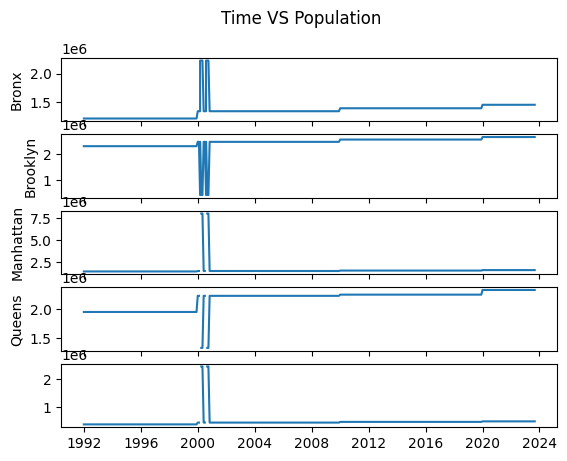

In [ ]:
import matplotlib.pyplot as plt
figure, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)
figure.suptitle('Time VS Population')
ax1.plot(data_bronx['DATE'], data_bronx['POPULATION'])
ax2.plot(data_brook['DATE'], data_brook['POPULATION'])
ax3.plot(data_man['DATE'], data_man['POPULATION'])
ax4.plot(data_qns['DATE'], data_qns['POPULATION'])
ax5.plot(data_si['DATE'], data_si['POPULATION'])
ax1.set(ylabel = 'Bronx')
ax2.set(ylabel = 'Brooklyn')
ax3.set(ylabel = 'Manhattan')
ax4.set(ylabel = 'Queens')

[Text(0, 0.5, 'Staten Island')]

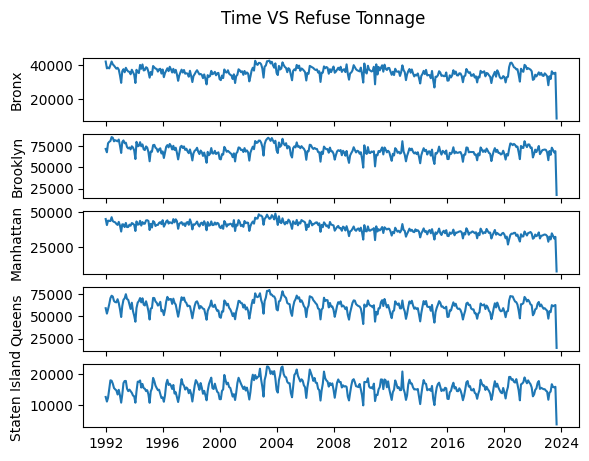

In [ ]:
import matplotlib.pyplot as plt
figure, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)
figure.suptitle('Time VS Refuse Tonnage')
ax1.plot(data_bronx['DATE'], data_bronx['REFUSETONSCOLLECTED'])
ax2.plot(data_brook['DATE'], data_brook['REFUSETONSCOLLECTED'])
ax3.plot(data_man['DATE'], data_man['REFUSETONSCOLLECTED'])
ax4.plot(data_qns['DATE'], data_qns['REFUSETONSCOLLECTED'])
ax5.plot(data_si['DATE'], data_si['REFUSETONSCOLLECTED'])
ax1.set(ylabel = 'Bronx')
ax2.set(ylabel = 'Brooklyn')
ax3.set(ylabel = 'Manhattan')
ax4.set(ylabel = 'Queens')
ax5.set(ylabel = 'Staten Island')

[Text(0, 0.5, 'Staten Island')]

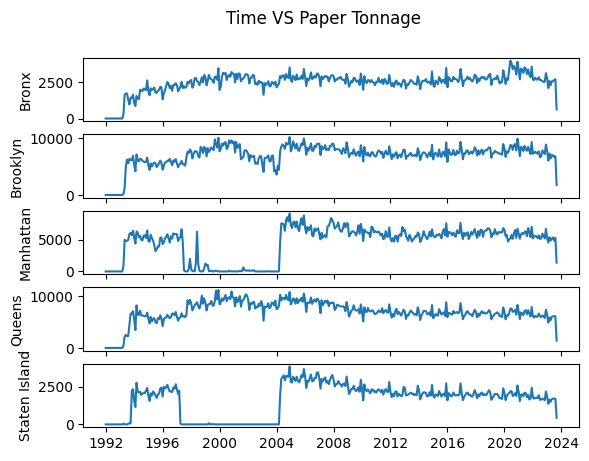

In [ ]:
import matplotlib.pyplot as plt
figure, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)
figure.suptitle('Time VS Paper Tonnage')
ax1.plot(data_bronx['DATE'], data_bronx['PAPERTONSCOLLECTED'])
ax2.plot(data_brook['DATE'], data_brook['PAPERTONSCOLLECTED'])
ax3.plot(data_man['DATE'], data_man['PAPERTONSCOLLECTED'])
ax4.plot(data_qns['DATE'], data_qns['PAPERTONSCOLLECTED'])
ax5.plot(data_si['DATE'], data_si['PAPERTONSCOLLECTED'])
ax1.set(ylabel = 'Bronx')
ax2.set(ylabel = 'Brooklyn')
ax3.set(ylabel = 'Manhattan')
ax4.set(ylabel = 'Queens')
ax5.set(ylabel = 'Staten Island')

[Text(0, 0.5, 'Staten Island')]

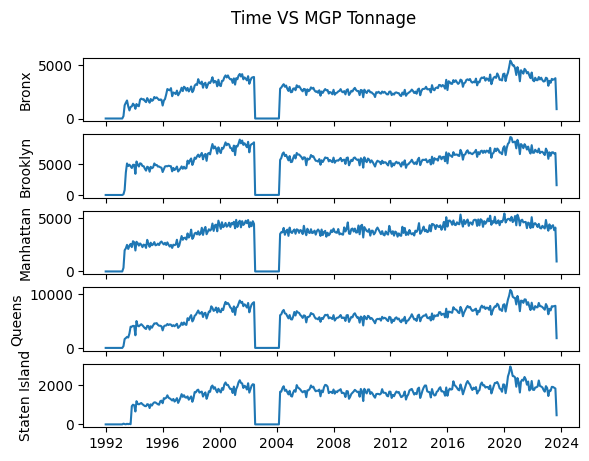

In [ ]:
import matplotlib.pyplot as plt
figure, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)
figure.suptitle('Time VS MGP Tonnage')
ax1.plot(data_bronx['DATE'], data_bronx['MGPTONSCOLLECTED'])
ax2.plot(data_brook['DATE'], data_brook['MGPTONSCOLLECTED'])
ax3.plot(data_man['DATE'], data_man['MGPTONSCOLLECTED'])
ax4.plot(data_qns['DATE'], data_qns['MGPTONSCOLLECTED'])
ax5.plot(data_si['DATE'], data_si['MGPTONSCOLLECTED'])
ax1.set(ylabel = 'Bronx')
ax2.set(ylabel = 'Brooklyn')
ax3.set(ylabel = 'Manhattan')
ax4.set(ylabel = 'Queens')
ax5.set(ylabel = 'Staten Island')

[Text(0, 0.5, 'Staten Island')]

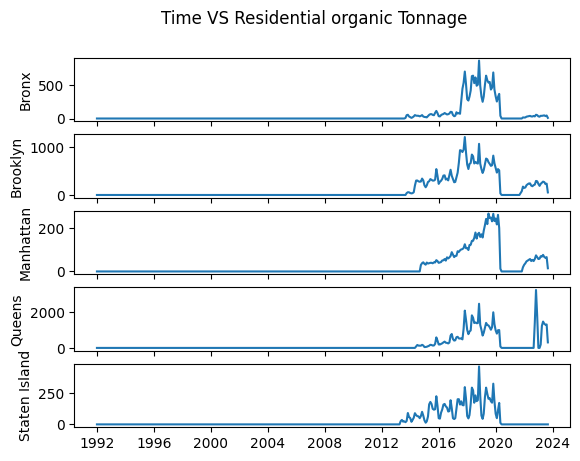

In [ ]:
import matplotlib.pyplot as plt
figure, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)
figure.suptitle('Time VS Residential organic Tonnage')
ax1.plot(data_bronx['DATE'], data_bronx['RESORGANICSTONS'])
ax2.plot(data_brook['DATE'], data_brook['RESORGANICSTONS'])
ax3.plot(data_man['DATE'], data_man['RESORGANICSTONS'])
ax4.plot(data_qns['DATE'], data_qns['RESORGANICSTONS'])
ax5.plot(data_si['DATE'], data_si['RESORGANICSTONS'])
ax1.set(ylabel = 'Bronx')
ax2.set(ylabel = 'Brooklyn')
ax3.set(ylabel = 'Manhattan')
ax4.set(ylabel = 'Queens')
ax5.set(ylabel = 'Staten Island')

[Text(0, 0.5, 'Staten Island')]

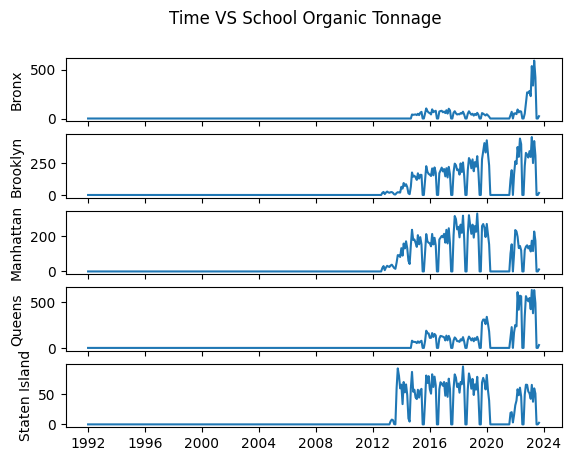

In [ ]:
import matplotlib.pyplot as plt
figure, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)
figure.suptitle('Time VS School Organic Tonnage')
ax1.plot(data_bronx['DATE'], data_bronx['SCHOOLORGANICTONS'])
ax2.plot(data_brook['DATE'], data_brook['SCHOOLORGANICTONS'])
ax3.plot(data_man['DATE'], data_man['SCHOOLORGANICTONS'])
ax4.plot(data_qns['DATE'], data_qns['SCHOOLORGANICTONS'])
ax5.plot(data_si['DATE'], data_si['SCHOOLORGANICTONS'])
ax1.set(ylabel = 'Bronx')
ax2.set(ylabel = 'Brooklyn')
ax3.set(ylabel = 'Manhattan')
ax4.set(ylabel = 'Queens')
ax5.set(ylabel = 'Staten Island')

[Text(0, 0.5, 'Staten Island')]

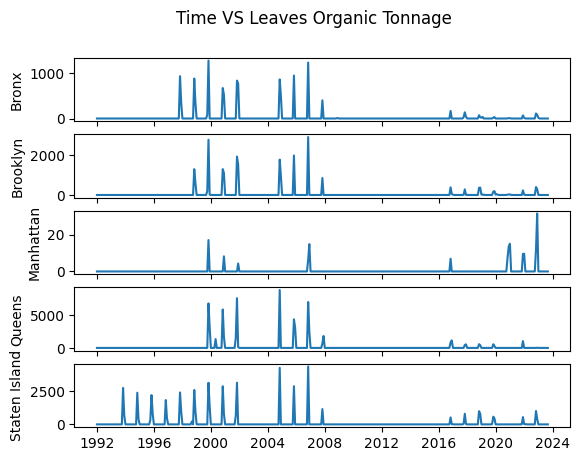

In [ ]:
import matplotlib.pyplot as plt
figure, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)
figure.suptitle('Time VS Leaves Organic Tonnage')
ax1.plot(data_bronx['DATE'], data_bronx['LEAVESORGANICTONS'])
ax2.plot(data_brook['DATE'], data_brook['LEAVESORGANICTONS'])
ax3.plot(data_man['DATE'], data_man['LEAVESORGANICTONS'])
ax4.plot(data_qns['DATE'], data_qns['LEAVESORGANICTONS'])
ax5.plot(data_si['DATE'], data_si['LEAVESORGANICTONS'])
ax1.set(ylabel = 'Bronx')
ax2.set(ylabel = 'Brooklyn')
ax3.set(ylabel = 'Manhattan')
ax4.set(ylabel = 'Queens')
ax5.set(ylabel = 'Staten Island')

[Text(0, 0.5, 'Staten Island')]

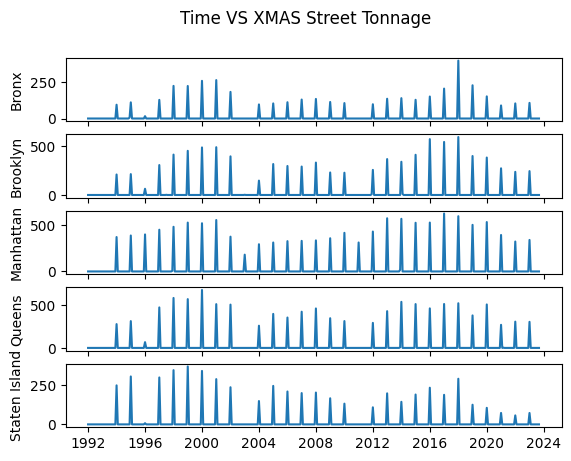

In [ ]:
import matplotlib.pyplot as plt
figure, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)
figure.suptitle('Time VS XMAS Street Tonnage')
ax1.plot(data_bronx['DATE'], data_bronx['XMASTREETONS'])
ax2.plot(data_brook['DATE'], data_brook['XMASTREETONS'])
ax3.plot(data_man['DATE'], data_man['XMASTREETONS'])
ax4.plot(data_qns['DATE'], data_qns['XMASTREETONS'])
ax5.plot(data_si['DATE'], data_si['XMASTREETONS'])
ax1.set(ylabel = 'Bronx')
ax2.set(ylabel = 'Brooklyn')
ax3.set(ylabel = 'Manhattan')
ax4.set(ylabel = 'Queens')
ax5.set(ylabel = 'Staten Island')

[Text(0, 0.5, 'Staten Island')]

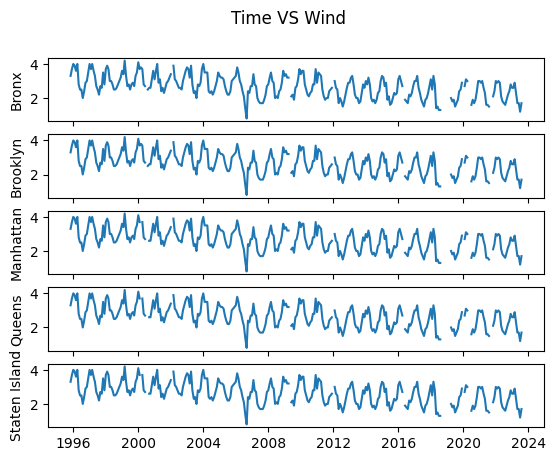

In [ ]:
import matplotlib.pyplot as plt
figure, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)
figure.suptitle('Time VS Wind')
ax1.plot(data_bronx['DATE'], data_bronx['AWND'])
ax2.plot(data_brook['DATE'], data_brook['AWND'])
ax3.plot(data_man['DATE'], data_man['AWND'])
ax4.plot(data_qns['DATE'], data_qns['AWND'])
ax5.plot(data_si['DATE'], data_si['AWND'])
ax1.set(ylabel = 'Bronx')
ax2.set(ylabel = 'Brooklyn')
ax3.set(ylabel = 'Manhattan')
ax4.set(ylabel = 'Queens')
ax5.set(ylabel = 'Staten Island')

[Text(0, 0.5, 'Staten Island')]

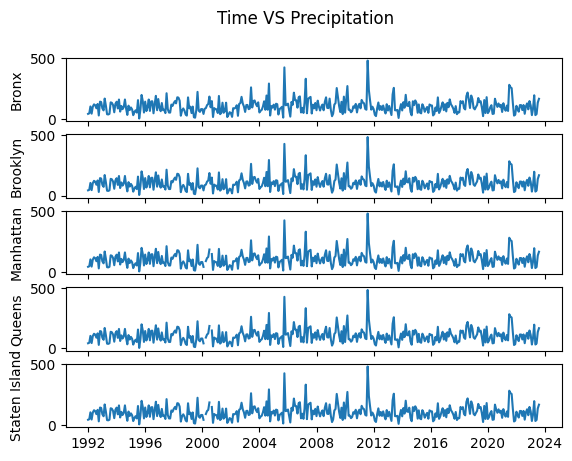

In [ ]:
import matplotlib.pyplot as plt
figure, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)
figure.suptitle('Time VS Precipitation')
ax1.plot(data_bronx['DATE'], data_bronx['PRCP'])
ax2.plot(data_brook['DATE'], data_brook['PRCP'])
ax3.plot(data_man['DATE'], data_man['PRCP'])
ax4.plot(data_qns['DATE'], data_qns['PRCP'])
ax5.plot(data_si['DATE'], data_si['PRCP'])
ax1.set(ylabel = 'Bronx')
ax2.set(ylabel = 'Brooklyn')
ax3.set(ylabel = 'Manhattan')
ax4.set(ylabel = 'Queens')
ax5.set(ylabel = 'Staten Island')

[Text(0, 0.5, 'Staten Island')]

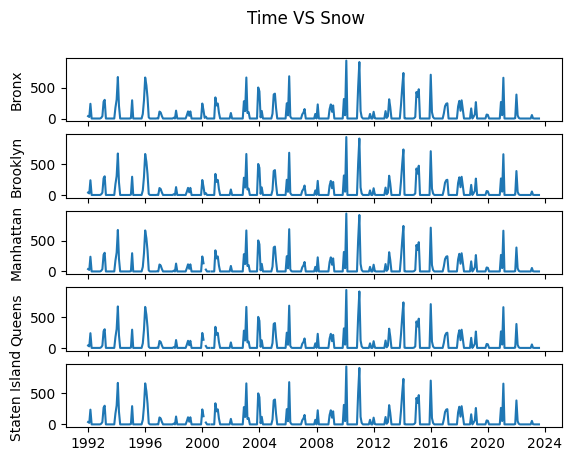

In [ ]:
import matplotlib.pyplot as plt
figure, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)
figure.suptitle('Time VS Snow')
ax1.plot(data_bronx['DATE'], data_bronx['SNOW'])
ax2.plot(data_brook['DATE'], data_brook['SNOW'])
ax3.plot(data_man['DATE'], data_man['SNOW'])
ax4.plot(data_qns['DATE'], data_qns['SNOW'])
ax5.plot(data_si['DATE'], data_si['SNOW'])
ax1.set(ylabel = 'Bronx')
ax2.set(ylabel = 'Brooklyn')
ax3.set(ylabel = 'Manhattan')
ax4.set(ylabel = 'Queens')
ax5.set(ylabel = 'Staten Island')

[Text(0, 0.5, 'Staten Island')]

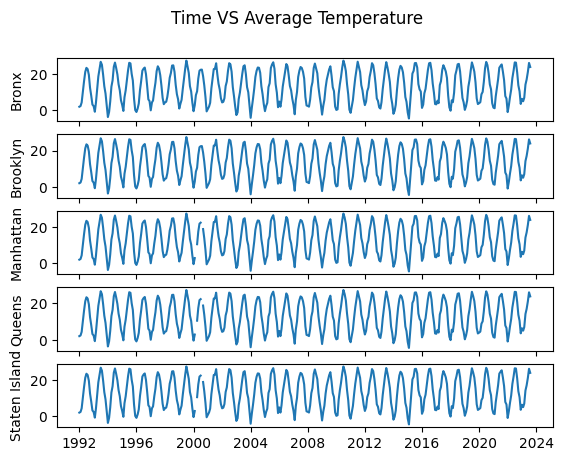

In [ ]:
import matplotlib.pyplot as plt
figure, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)
figure.suptitle('Time VS Average Temperature')
ax1.plot(data_bronx['DATE'], data_bronx['TAVG'])
ax2.plot(data_brook['DATE'], data_brook['TAVG'])
ax3.plot(data_man['DATE'], data_man['TAVG'])
ax4.plot(data_qns['DATE'], data_qns['TAVG'])
ax5.plot(data_si['DATE'], data_si['TAVG'])
ax1.set(ylabel = 'Bronx')
ax2.set(ylabel = 'Brooklyn')
ax3.set(ylabel = 'Manhattan')
ax4.set(ylabel = 'Queens')
ax5.set(ylabel = 'Staten Island')

[Text(0, 0.5, 'Staten Island')]

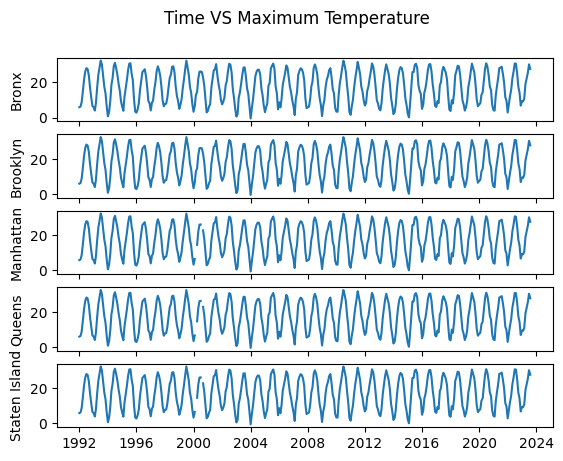

In [ ]:
import matplotlib.pyplot as plt
figure, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)
figure.suptitle('Time VS Maximum Temperature')
ax1.plot(data_bronx['DATE'], data_bronx['TMAX'])
ax2.plot(data_brook['DATE'], data_brook['TMAX'])
ax3.plot(data_man['DATE'], data_man['TMAX'])
ax4.plot(data_qns['DATE'], data_qns['TMAX'])
ax5.plot(data_si['DATE'], data_si['TMAX'])
ax1.set(ylabel = 'Bronx')
ax2.set(ylabel = 'Brooklyn')
ax3.set(ylabel = 'Manhattan')
ax4.set(ylabel = 'Queens')
ax5.set(ylabel = 'Staten Island')

[Text(0, 0.5, 'Staten Island')]

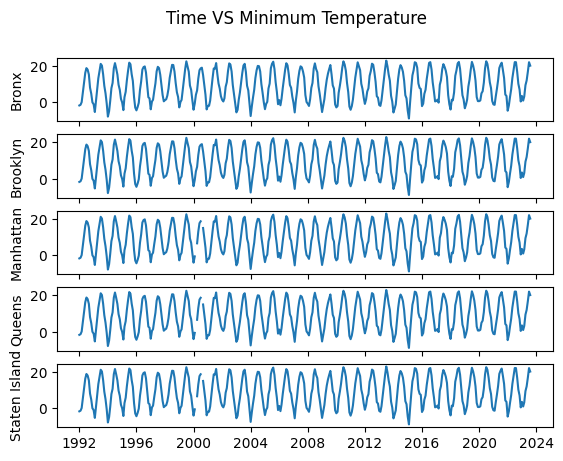

In [ ]:
import matplotlib.pyplot as plt
figure, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)
figure.suptitle('Time VS Minimum Temperature')
ax1.plot(data_bronx['DATE'], data_bronx['TMIN'])
ax2.plot(data_brook['DATE'], data_brook['TMIN'])
ax3.plot(data_man['DATE'], data_man['TMIN'])
ax4.plot(data_qns['DATE'], data_qns['TMIN'])
ax5.plot(data_si['DATE'], data_si['TMIN'])
ax1.set(ylabel = 'Bronx')
ax2.set(ylabel = 'Brooklyn')
ax3.set(ylabel = 'Manhattan')
ax4.set(ylabel = 'Queens')
ax5.set(ylabel = 'Staten Island')

[Text(0, 0.5, 'Staten Island')]

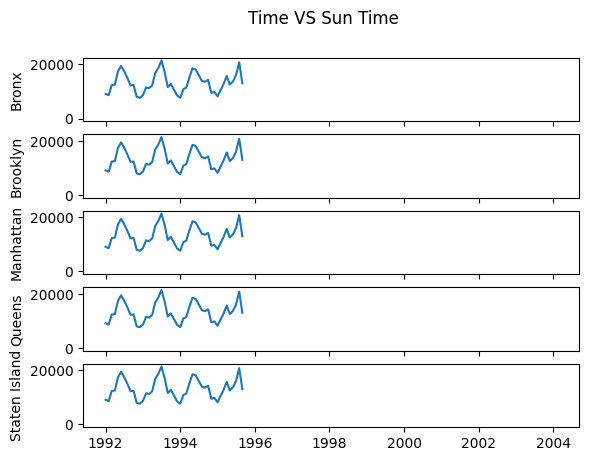

In [ ]:
import matplotlib.pyplot as plt
figure, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)
figure.suptitle('Time VS Sun Time')
ax1.plot(data_bronx['DATE'], data_bronx['TSUN'])
ax2.plot(data_brook['DATE'], data_brook['TSUN'])
ax3.plot(data_man['DATE'], data_man['TSUN'])
ax4.plot(data_qns['DATE'], data_qns['TSUN'])
ax5.plot(data_si['DATE'], data_si['TSUN'])
ax1.set(ylabel = 'Bronx')
ax2.set(ylabel = 'Brooklyn')
ax3.set(ylabel = 'Manhattan')
ax4.set(ylabel = 'Queens')
ax5.set(ylabel = 'Staten Island')

## **descriptive statistics (including biases in labels)**

There is likely to be limited bias in the labelling. This is due to the fact that all the waste to be concerend about is included in this data set. In addition, the data is likely fairly accurate, as most disposal of waste is billed per ton. Therefore, there is an incentive to insure accurate collection of data.

Mean, Median, Variance and Standard Deviation of Precipitation, by month

In [ ]:
precipds=pandas.DataFrame(data={'month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                                 'Mean':[jan['PRCP'].mean(),feb['PRCP'].mean(),mar['PRCP'].mean(),apr['PRCP'].mean(),may['PRCP'].mean(),jun['PRCP'].mean(),jul['PRCP'].mean(),aug['PRCP'].mean(),sep['PRCP'].mean(),oct['PRCP'].mean(),nov['PRCP'].mean(),dec['PRCP'].mean()],
                                 "Median":[jan['PRCP'].median(),feb['PRCP'].median(),mar['PRCP'].median(),apr['PRCP'].median(),may['PRCP'].median(),jun['PRCP'].median(),jul['PRCP'].median(),aug['PRCP'].median(),sep['PRCP'].median(),oct['PRCP'].median(),nov['PRCP'].median(),dec['PRCP'].median()],
                                 "Variance":[jan['PRCP'].var(),feb['PRCP'].var(),mar['PRCP'].var(),apr['PRCP'].var(),may['PRCP'].var(),jun['PRCP'].var(),jul['PRCP'].var(),aug['PRCP'].var(),sep['PRCP'].var(),oct['PRCP'].var(),nov['PRCP'].var(),dec['PRCP'].var()],
                                 "Std. Dev.":[jan['PRCP'].std(),feb['PRCP'].std(),mar['PRCP'].std(),apr['PRCP'].std(),may['PRCP'].std(),jun['PRCP'].std(),jul['PRCP'].std(),aug['PRCP'].std(),sep['PRCP'].std(),oct['PRCP'].std(),nov['PRCP'].std(),dec['PRCP'].std()]})
precipds

,month,Mean,Median,Variance,Std. Dev.
0,Jan,92.778125,89.20,1117.384110,33.427296
1,Feb,82.078125,75.20,1546.719959,39.328361
2,Mar,105.541509,102.00,2632.525102,51.308139
3,Apr,106.406250,94.00,3604.694300,60.039106
4,May,99.971875,101.95,1845.114613,42.954797
5,Jun,110.484375,95.40,4051.297553,63.649804
6,Jul,122.581250,114.85,3701.014741,60.835966
7,Aug,117.691824,94.00,7187.969616,84.781894
8,Sep,114.593548,100.10,4497.407101,67.062710
9,Oct,114.461290,115.40,6047.254985,77.764098


Mean, Median, Variance and Standard Deviation of Minimum Temperature, by month

*   List item
*   List item



In [ ]:
tminds=pandas.DataFrame(data={'month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                                 'Mean':[jan['TMIN'].mean(),feb['TMIN'].mean(),mar['TMIN'].mean(),apr['TMIN'].mean(),may['TMIN'].mean(),jun['TMIN'].mean(),jul['TMIN'].mean(),aug['TMIN'].mean(),sep['TMIN'].mean(),oct['TMIN'].mean(),nov['TMIN'].mean(),dec['TMIN'].mean()],
                                 "Median":[jan['TMIN'].median(),feb['TMIN'].median(),mar['TMIN'].median(),apr['TMIN'].median(),may['TMIN'].median(),jun['TMIN'].median(),jul['TMIN'].median(),aug['TMIN'].median(),sep['TMIN'].median(),oct['TMIN'].median(),nov['TMIN'].median(),dec['TMIN'].median()],
                                 "Variance":[jan['TMIN'].var(),feb['TMIN'].var(),mar['TMIN'].var(),apr['TMIN'].var(),may['TMIN'].var(),jun['TMIN'].var(),jul['TMIN'].var(),aug['TMIN'].var(),sep['TMIN'].var(),oct['TMIN'].var(),nov['TMIN'].var(),dec['TMIN'].var()],
                                 "Std. Dev.":[jan['TMIN'].std(),feb['TMIN'].std(),mar['TMIN'].std(),apr['TMIN'].std(),may['TMIN'].std(),jun['TMIN'].std(),jul['TMIN'].std(),aug['TMIN'].std(),sep['TMIN'].std(),oct['TMIN'].std(),nov['TMIN'].std(),dec['TMIN'].std()]})
tminds

,month,Mean,Median,Variance,Std. Dev.
0,Jan,-2.403437,-2.435,7.078998,2.660639
1,Feb,-1.649688,-1.640,5.638185,2.374486
2,Mar,1.889245,1.500,3.003440,1.733044
3,Apr,7.258750,7.245,1.177401,1.085081
4,May,12.413438,12.515,1.549218,1.244676
5,Jun,17.733438,17.690,0.619847,0.787303
6,Jul,20.984375,21.290,1.634578,1.278506
7,Aug,20.359748,20.380,1.335351,1.155574
8,Sep,16.637742,16.770,1.147362,1.071150
9,Oct,10.594839,10.380,1.945441,1.394791


Mean, Median, Variance and Standard Deviation of Snowfall, by month

In [ ]:
snowds=pandas.DataFrame(data={'month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                                 'Mean':[jan['SNOW'].mean(),feb['SNOW'].mean(),mar['SNOW'].mean(),apr['SNOW'].mean(),may['SNOW'].mean(),jun['SNOW'].mean(),jul['SNOW'].mean(),aug['SNOW'].mean(),sep['SNOW'].mean(),oct['SNOW'].mean(),nov['SNOW'].mean(),dec['SNOW'].mean()],
                                 "Median":[jan['SNOW'].median(),feb['SNOW'].median(),mar['SNOW'].median(),apr['SNOW'].median(),may['SNOW'].median(),jun['SNOW'].median(),jul['SNOW'].median(),aug['SNOW'].median(),sep['SNOW'].median(),oct['SNOW'].median(),nov['SNOW'].median(),dec['SNOW'].median()],
                                 "Variance":[jan['SNOW'].var(),feb['SNOW'].var(),mar['SNOW'].var(),apr['SNOW'].var(),may['SNOW'].var(),jun['SNOW'].var(),jul['SNOW'].var(),aug['SNOW'].var(),sep['SNOW'].var(),oct['SNOW'].var(),nov['SNOW'].var(),dec['SNOW'].var()],
                                 "Std. Dev.":[jan['SNOW'].std(),feb['SNOW'].std(),mar['SNOW'].std(),apr['SNOW'].std(),may['SNOW'].std(),jun['SNOW'].std(),jul['SNOW'].std(),aug['SNOW'].std(),sep['SNOW'].std(),oct['SNOW'].std(),nov['SNOW'].std(),dec['SNOW'].std()]})
snowds

,month,Mean,Median,Variance,Std. Dev.
0,Jan,215.187500,113.5,52528.140723,229.190185
1,Feb,258.343750,128.5,68265.195558,261.276091
2,Mar,118.962264,97.0,15603.188440,124.912723
3,Apr,9.156250,0.0,897.931407,29.965504
4,May,0.000000,0.0,0.000000,0.000000
5,Jun,0.000000,0.0,0.000000,0.000000
6,Jul,0.000000,0.0,0.000000,0.000000
7,Aug,0.000000,0.0,0.000000,0.000000
8,Sep,0.000000,0.0,0.000000,0.000000
9,Oct,2.387097,0.0,172.056975,13.117049


Mean, Median, Variance and Standard Deviation of tons of refuse (trash) collected, by borough

In [ ]:
refuseds=pandas.DataFrame(data={'Borough':['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
                               'Mean':[data_bronx['REFUSETONSCOLLECTED'].mean(),data_brook['REFUSETONSCOLLECTED'].mean(),data_man['REFUSETONSCOLLECTED'].mean(),data_qns['REFUSETONSCOLLECTED'].mean(),data_si['REFUSETONSCOLLECTED'].mean()],
                               'Median':[data_bronx['REFUSETONSCOLLECTED'].median(),data_brook['REFUSETONSCOLLECTED'].median(),data_man['REFUSETONSCOLLECTED'].median(),data_qns['REFUSETONSCOLLECTED'].median(),data_si['REFUSETONSCOLLECTED'].median()],
                               'Variance':[data_bronx['REFUSETONSCOLLECTED'].var(),data_brook['REFUSETONSCOLLECTED'].var(),data_man['REFUSETONSCOLLECTED'].var(),data_qns['REFUSETONSCOLLECTED'].var(),data_si['REFUSETONSCOLLECTED'].var()],
                               "Std. Dev.":[data_bronx['REFUSETONSCOLLECTED'].std(),data_brook['REFUSETONSCOLLECTED'].std(),data_man['REFUSETONSCOLLECTED'].std(),data_qns['REFUSETONSCOLLECTED'].std(),data_si['REFUSETONSCOLLECTED'].std()]})
refuseds

,Borough,Mean,Median,Variance,Std. Dev.
0,Bronx,35746.465013,35821.8,9.813733e+06,3132.687746
1,Brooklyn,69895.922193,69425.2,4.385651e+07,6622.424841
2,Manhattan,38519.738845,38768.1,1.926188e+07,4388.835670
3,Queens,61275.345407,61537.6,5.417064e+07,7360.070426
4,Staten Island,15721.413386,15646.5,5.756037e+06,2399.174172


Mean, Median, Variance and Standard Deviation of tons of paper collected, by borough

In [ ]:
paperds=pandas.DataFrame(data={'Borough':['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
                               'Mean':[data_bronx['PAPERTONSCOLLECTED'].mean(),data_brook['PAPERTONSCOLLECTED'].mean(),data_man['PAPERTONSCOLLECTED'].mean(),data_qns['PAPERTONSCOLLECTED'].mean(),data_si['PAPERTONSCOLLECTED'].mean()],
                               'Median':[data_bronx['PAPERTONSCOLLECTED'].median(),data_brook['PAPERTONSCOLLECTED'].median(),data_man['PAPERTONSCOLLECTED'].median(),data_qns['PAPERTONSCOLLECTED'].median(),data_si['PAPERTONSCOLLECTED'].median()],
                               'Variance':[data_bronx['PAPERTONSCOLLECTED'].var(),data_brook['PAPERTONSCOLLECTED'].var(),data_man['PAPERTONSCOLLECTED'].var(),data_qns['PAPERTONSCOLLECTED'].var(),data_si['PAPERTONSCOLLECTED'].var()],
                               "Std. Dev.":[data_bronx['PAPERTONSCOLLECTED'].std(),data_brook['PAPERTONSCOLLECTED'].std(),data_man['PAPERTONSCOLLECTED'].std(),data_qns['PAPERTONSCOLLECTED'].std(),data_si['PAPERTONSCOLLECTED'].std()]})

paperds

,Borough,Mean,Median,Variance,Std. Dev.
0,Bronx,2459.904439,2578.9,4.553656e+05,674.807833
1,Brooklyn,6972.928721,7270.6,3.570760e+06,1889.645460
2,Manhattan,4469.344619,5516.1,7.040556e+06,2653.404609
3,Queens,6964.334121,6920.8,4.186680e+06,2046.137914
4,Staten Island,1607.981365,1952.7,1.158915e+06,1076.529061


Mean, Median, Variance and Standard Deviation of tons of MGP (metal, glass, and plastics) collected, by borough

In [ ]:
mgpds=pandas.DataFrame(data={'Borough':['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
                               'Mean':[data_bronx['MGPTONSCOLLECTED'].mean(),data_brook['MGPTONSCOLLECTED'].mean(),data_man['MGPTONSCOLLECTED'].mean(),data_qns['MGPTONSCOLLECTED'].mean(),data_si['MGPTONSCOLLECTED'].mean()],
                               'Median':[data_bronx['MGPTONSCOLLECTED'].median(),data_brook['MGPTONSCOLLECTED'].median(),data_man['MGPTONSCOLLECTED'].median(),data_qns['MGPTONSCOLLECTED'].median(),data_si['MGPTONSCOLLECTED'].median()],
                               'Variance':[data_bronx['MGPTONSCOLLECTED'].var(),data_brook['MGPTONSCOLLECTED'].var(),data_man['MGPTONSCOLLECTED'].var(),data_qns['MGPTONSCOLLECTED'].var(),data_si['MGPTONSCOLLECTED'].var()],
                               "Std. Dev.":[data_bronx['MGPTONSCOLLECTED'].std(),data_brook['MGPTONSCOLLECTED'].std(),data_man['MGPTONSCOLLECTED'].std(),data_qns['MGPTONSCOLLECTED'].std(),data_si['MGPTONSCOLLECTED'].std()]})

mgpds

,Borough,Mean,Median,Variance,Std. Dev.
0,Bronx,2677.052480,2748.0,1.354555e+06,1163.853300
1,Brooklyn,5454.797389,5710.9,4.603938e+06,2145.679005
2,Manhattan,3462.454331,3792.7,1.781021e+06,1334.549060
3,Queens,5530.773753,5847.2,5.278409e+06,2297.478789
4,Staten Island,1481.896063,1652.2,3.774164e+05,614.342276


Mean, Median, Variance and Standard Deviation of tons of residential organics (compostables) collected from homes, by borough

In [ ]:
resorganicsds=pandas.DataFrame(data={'Borough':['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
                               'Mean':[data_bronx['RESORGANICSTONS'].mean(),data_brook['RESORGANICSTONS'].mean(),data_man['RESORGANICSTONS'].mean(),data_qns['RESORGANICSTONS'].mean(),data_si['RESORGANICSTONS'].mean()],
                               'Median':[data_bronx['RESORGANICSTONS'].median(),data_brook['RESORGANICSTONS'].median(),data_man['RESORGANICSTONS'].median(),data_qns['RESORGANICSTONS'].median(),data_si['RESORGANICSTONS'].median()],
                               'Variance':[data_bronx['RESORGANICSTONS'].var(),data_brook['RESORGANICSTONS'].var(),data_man['RESORGANICSTONS'].var(),data_qns['RESORGANICSTONS'].var(),data_si['RESORGANICSTONS'].var()],
                               "Std. Dev.":[data_bronx['RESORGANICSTONS'].std(),data_brook['RESORGANICSTONS'].std(),data_man['RESORGANICSTONS'].std(),data_qns['RESORGANICSTONS'].std(),data_si['RESORGANICSTONS'].std()]})

resorganicsds

,Borough,Mean,Median,Variance,Std. Dev.
0,Bronx,49.259530,0.0,19342.820531,139.078469
1,Brooklyn,108.987990,0.0,49800.865667,223.161076
2,Manhattan,23.400787,0.0,2939.743394,54.219401
3,Queens,168.807349,0.0,190379.426788,436.324910
4,Staten Island,27.810236,0.0,4298.978921,65.566599


Mean, Median, Variance and Standard Deviation of tons of school organics (compostables) collected from schools, by borough

In [ ]:
schoolorganicds=pandas.DataFrame(data={'Borough':['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
                               'Mean':[data_bronx['SCHOOLORGANICTONS'].mean(),data_brook['SCHOOLORGANICTONS'].mean(),data_man['SCHOOLORGANICTONS'].mean(),data_qns['SCHOOLORGANICTONS'].mean(),data_si['SCHOOLORGANICTONS'].mean()],
                               'Median':[data_bronx['SCHOOLORGANICTONS'].median(),data_brook['SCHOOLORGANICTONS'].median(),data_man['SCHOOLORGANICTONS'].median(),data_qns['SCHOOLORGANICTONS'].median(),data_si['SCHOOLORGANICTONS'].median()],
                               'Variance':[data_bronx['SCHOOLORGANICTONS'].var(),data_brook['SCHOOLORGANICTONS'].var(),data_man['SCHOOLORGANICTONS'].var(),data_qns['SCHOOLORGANICTONS'].var(),data_si['SCHOOLORGANICTONS'].var()],
                               "Std. Dev.":[data_bronx['SCHOOLORGANICTONS'].std(),data_brook['SCHOOLORGANICTONS'].std(),data_man['SCHOOLORGANICTONS'].std(),data_qns['SCHOOLORGANICTONS'].std(),data_si['SCHOOLORGANICTONS'].std()]})

schoolorganicds

,Borough,Mean,Median,Variance,Std. Dev.
0,Bronx,17.835509,0.0,3506.547322,59.216107
1,Brooklyn,48.034204,0.0,9997.134927,99.985674
2,Manhattan,43.082677,0.0,6787.809278,82.388162
3,Queens,39.490814,0.0,11827.813047,108.755749
4,Staten Island,13.440945,0.0,662.966056,25.748127


Mean, Median, Variance and Standard Deviation of tons of leaf organics (compostable leaves) collected from streets, by borough

In [ ]:
leavesorganicds=pandas.DataFrame(data={'Borough':['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
                               'Mean':[data_bronx['LEAVESORGANICTONS'].mean(),data_brook['LEAVESORGANICTONS'].mean(),data_man['LEAVESORGANICTONS'].mean(),data_qns['LEAVESORGANICTONS'].mean(),data_si['LEAVESORGANICTONS'].mean()],
                               'Median':[data_bronx['LEAVESORGANICTONS'].median(),data_brook['LEAVESORGANICTONS'].median(),data_man['LEAVESORGANICTONS'].median(),data_qns['LEAVESORGANICTONS'].median(),data_si['LEAVESORGANICTONS'].median()],
                               'Variance':[data_bronx['LEAVESORGANICTONS'].var(),data_brook['LEAVESORGANICTONS'].var(),data_man['LEAVESORGANICTONS'].var(),data_qns['LEAVESORGANICTONS'].var(),data_si['LEAVESORGANICTONS'].var()],
                               "Std. Dev.":[data_bronx['LEAVESORGANICTONS'].std(),data_brook['LEAVESORGANICTONS'].std(),data_man['LEAVESORGANICTONS'].std(),data_qns['LEAVESORGANICTONS'].std(),data_si['LEAVESORGANICTONS'].std()]})

leavesorganicds

,Borough,Mean,Median,Variance,Std. Dev.
0,Bronx,29.792167,0.0,22738.656274,150.793423
1,Brooklyn,57.675979,0.0,92087.949997,303.459964
2,Manhattan,0.409449,0.0,6.297542,2.509490
3,Queens,161.398163,0.0,807977.784497,898.875845
4,Staten Island,130.761942,0.0,296096.520995,544.147518


Mean, Median, Variance and Standard Deviation of tons of Christmas Trees  collected from homes, by borough

In [ ]:
xmastreeds=pandas.DataFrame(data={'Borough':['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
                               'Mean':[data_bronx['XMASTREETONS'].mean(),data_brook['XMASTREETONS'].mean(),data_man['XMASTREETONS'].mean(),data_qns['XMASTREETONS'].mean(),data_si['XMASTREETONS'].mean()],
                               'Median':[data_bronx['XMASTREETONS'].median(),data_brook['XMASTREETONS'].median(),data_man['XMASTREETONS'].median(),data_qns['XMASTREETONS'].median(),data_si['XMASTREETONS'].median()],
                               'Variance':[data_bronx['XMASTREETONS'].var(),data_brook['XMASTREETONS'].var(),data_man['XMASTREETONS'].var(),data_qns['XMASTREETONS'].var(),data_si['XMASTREETONS'].var()],
                               "Std. Dev.":[data_bronx['XMASTREETONS'].std(),data_brook['XMASTREETONS'].std(),data_man['XMASTREETONS'].std(),data_qns['XMASTREETONS'].std(),data_si['XMASTREETONS'].std()]})

xmastreeds

,Borough,Mean,Median,Variance,Std. Dev.
0,Bronx,10.954569,0.0,1909.475889,43.697550
1,Brooklyn,24.951697,0.0,9049.201195,95.127289
2,Manhattan,33.851444,0.0,14307.597241,119.614369
3,Queens,30.535433,0.0,12972.968294,113.898939
4,Staten Island,14.452756,0.0,3259.228341,57.089652


# Missing, imbalanced, or sparse data problems

This dataset is fairly complete, for the entire city. However, there are still certain problems with using the entire dataset to predict outcomes.

One issue is that certain programs have only been started recently. For instance, residential and school organics collection were only started around 2013, which means that there is no data for those two waste streams before 2013. In addtion, the volume collected slowly ramps up, as the collection programs are introduced in a pilot program at first, and more and more locations are added. In addtion, people must get used to using the new bins provided, and so the volume collected will naturall increase over time. However, this initially increasing trend will level out, as program expantion completes and people get used to using the new bins. Therefore, in predicting future volumes, we must aim to predict the baseline volume after ramp up finishes, in order to avoid predicting a never-ending linear increase in volume.

In addition, there are periods where the collection volumes drop to zero. Some of these changes are due to the seasonal nature of the waste stream. For instance, school organics drop to zero over the summer, as schools are not in session, and meals are not served. In addition, Xmas tree collection is only in January, as this waste stream is only generated and collected once a year, after christmas. Similarily, leaves organics are only generated and collected in the fall, as that is when the leaves drop from trees. These changes are repeated, year after year, consistently. Therefore, these changes must be accounted for in our model.

However, there are also abnormal periods, of zero collection data for a waste stream, often spanning many years. However, these periods are not indicative of missing data, but of changes to collection or generation. For instance, MGP data drops to zero around 2003-2004. This is due to the fact that MGP collection was suspended around this time period, due to budgetary issues. (https://www.nytimes.com/2002/08/12/nyregion/new-yorkers-getting-used-to-recycling-a-little-less.html). Similarily, paper collection was suspended in Manhattan from 99-04, and in Staten Island from 97-04, and leaf collection was suspended from 08-16. Another cause of collection suspension is evident in the zero volume of residential organics from 20-22, as this was suspended due to COVID. (https://www.nyc.gov/assets/dsny/site/resources/press-releases/nyc-sanitation-announces-service-changes-related-to-covid-19-budget-cuts). In addition, school organics collection also dropped to 0 in 2020, as schools were closed due to the COVID pandemic. This volume ramps back up as students slowly return to the reopened schools in person. As these changes are generally not indicative of normal volumes, and are driven by unpredictable, outside factors, they should be ignored in or model.

Last, there are also periods where the data is imbalanced, due to fraud. In partucular, recycling volume data from before 97 is impacted by fraud, as the city artificially increased the volume of recyclables reported to be colleted in order to create the appearance of meeting a 25% recyling diversion rate. (https://www.nydailynews.com/1997/01/17/recycling-trashed-by-city-judge/).

